<a href="https://colab.research.google.com/github/jakechinmk/data_science/blob/main/give_me_credit/notebook/02_missing_value_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
Conduct Binning to understand the importance of missing values in linear model sense

# Setup

In [ ]:
!pip install -q optbinning

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from optbinning import BinningProcess, Scorecard
from optbinning.scorecard import plot_auc_roc, plot_cap, plot_ks

(CVXPY) Apr 25 03:18:38 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 25 03:18:38 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


## Global Configuration

In [ ]:
TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/Paidy/output/train_df.csv'
VALID_PATH = '/content/drive/MyDrive/Colab Notebooks/Paidy/output/valid_df.csv'
OUTPUT_DIR = '/content/drive/MyDrive/Colab Notebooks/Paidy/output/'
OUTPUT = True
SEED = 123

# Data
## Information from Data Dictionary
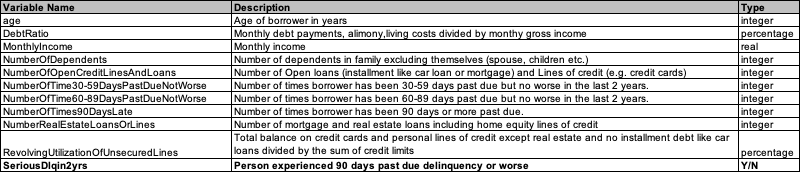

## Read Data

In [ ]:
train_df = pd.read_csv(TRAIN_PATH)
valid_df = pd.read_csv(VALID_PATH)

target = 'serious_dlqin_2yrs'
features = train_df.columns.drop(target).tolist()

In [ ]:
x = train_df.loc[:, features]
y = train_df.loc[:, target]

# Binning

In [ ]:
selection_criteria = {
    'iv': {'min':0.02, 'max':1},
    'quality_score':{'min':0.01}
}

binning_process = BinningProcess(features,
                                 selection_criteria=selection_criteria,
                                 )

scaling_method_params = {'min':0, 'max':1000}

model = LogisticRegression(solver='lbfgs', 
                           class_weight='balanced', 
                           random_state=SEED
                           )
scorecard = Scorecard(binning_process=binning_process,
                      estimator=model,
                      scaling_method='min_max',
                      scaling_method_params=scaling_method_params,
                      reverse_scorecard=True,
                      )
scorecard.fit(x, y, show_digits=4)

Scorecard(binning_process=BinningProcess(selection_criteria={'iv': {'max': 1,
                                                                    'min': 0.02},
                                                             'quality_score': {'min': 0.01}},
                                         variable_names=['revolving_utilization_of_unsecured_lines',
                                                         'age',
                                                         'number_of_time_30_59_days_past_due_not_worse',
                                                         'debt_ratio',
                                                         'monthly_income',
                                                         'number_of_open_credit_lines_and_loans',
                                                         'number_of_times_90_days_late',
                                                         'number_real_estate_loans_or_lines',
                                                         'number_of_time_60_89_days_past_due_not_worse',
                                                         'number_of_dependents']),
          estimator=LogisticRegression(class_weight='balanced',
                                       random_state=123),
          reverse_scorecard=True, scaling_method='min_max',
          scaling_method_params={'max': 1000, 'min': 0})

In [ ]:
scorecard_df = scorecard.table(style='detailed')

In [ ]:
scorecard_df

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,age,0,"(-inf, 29.5000)",8821,0.058807,7786,1035,0.117334,-0.618349,0.029438,0.003622,-0.721545,81.595744
1,age,1,"[29.5000, 36.5000)",15044,0.100293,13451,1593,0.105889,-0.502841,0.031574,0.003906,-0.721545,72.620410
2,age,2,"[36.5000, 43.5000)",20644,0.137627,18779,1865,0.090341,-0.326797,0.016946,0.002109,-0.721545,58.941330
3,age,3,"[43.5000, 47.5000)",14229,0.094860,13073,1156,0.081243,-0.210692,0.004615,0.000576,-0.721545,49.919647
4,age,4,"[47.5000, 49.5000)",7643,0.050953,7044,599,0.078372,-0.171605,0.001617,0.000202,-0.721545,46.882511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,number_of_dependents,1,"[0.5000, 1.5000)",26316,0.175440,24381,1935,0.073529,-0.102578,0.001930,0.000241,-0.354464,37.463934
2,number_of_dependents,2,"[1.5000, 2.5000)",19522,0.130147,17938,1584,0.081139,-0.209307,0.006245,0.000779,-0.354464,41.537978
3,number_of_dependents,3,"[2.5000, inf)",13336,0.088907,12103,1233,0.092457,-0.352272,0.012863,0.001600,-0.354464,46.995229
4,number_of_dependents,4,Special,0,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,-0.354464,33.548326


In [ ]:
scorecard_df.groupby('Variable')['IV'].sum().sort_values()

Variable
number_of_dependents                            0.035303
number_real_estate_loans_or_lines               0.055354
debt_ratio                                      0.077609
monthly_income                                  0.080132
number_of_open_credit_lines_and_loans           0.084626
age                                             0.264243
number_of_time_60_89_days_past_due_not_worse    0.572373
number_of_time_30_59_days_past_due_not_worse    0.740481
number_of_times_90_days_late                    0.837551
Name: IV, dtype: float64

In [ ]:
col_list = ['monthly_income', 'number_of_dependents']
mask = scorecard_df.loc[:, 'Variable'].isin(col_list)
scorecard_df.loc[mask, :]

,Variable,Bin id,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS,Coefficient,Points
0,monthly_income,0,"(-inf, 1508.5000)",7640,0.050933,7080,560,0.073298,-0.099183,5.230844e-04,6.535877e-05,-0.325147,37.021187
1,monthly_income,1,"[1508.5000, 2569.5000)",10929,0.072860,9879,1050,0.096075,-0.394654,1.347755e-02,1.673845e-03,-0.325147,47.367066
2,monthly_income,2,"[2569.5000, 3459.5000)",12232,0.081547,11006,1226,0.100229,-0.441591,1.927686e-02,2.390218e-03,-0.325147,49.010571
3,monthly_income,3,"[3459.5000, 4831.5000)",20911,0.139407,19191,1720,0.082253,-0.224158,7.722221e-03,9.632618e-04,-0.325147,41.397176
4,monthly_income,4,"[4831.5000, 5320.5000)",7611,0.050740,7068,543,0.071344,-0.070051,2.566751e-04,3.207783e-05,-0.325147,36.001166
5,monthly_income,5,"[5320.5000, 6643.5000)",16128,0.107520,15050,1078,0.066840,-0.000004,2.132545e-12,2.665742e-13,-0.325147,33.548482
6,monthly_income,6,"[6643.5000, 7656.5000)",9903,0.066020,9353,550,0.055539,0.197259,2.359650e-03,2.944790e-04,-0.325147,26.641328
7,monthly_income,7,"[7656.5000, 9945.5000)",14975,0.099833,14207,768,0.051285,0.281425,7.006530e-03,8.729375e-04,-0.325147,23.694262
8,monthly_income,8,"[9945.5000, inf)",19940,0.132933,19078,862,0.043230,0.460761,2.318562e-02,2.872834e-03,-0.325147,17.414859
9,monthly_income,9,Special,0,0.000000,0,0,0.000000,0.000000,0.000000e+00,0.000000e+00,-0.325147,33.548326


# Conclusion
- Monthly income, the one that is missing having same importance with the median value
- Number of Depedents the one that is missing is having lesser importance than all other variables.

So it is encouraged that we possibly does not need to handle it or just a simple median imputer will do.